<a href="https://colab.research.google.com/github/abhi2995/PlayStore_Analysis/blob/main/capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success. 


Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Getting data from CSV file using Pandas

In [ ]:
#Creating dataframes for both playstore data as well as user reviews data
df_play_store = pd.read_csv('/content/drive/MyDrive/Cp-1/Copy of Play Store Data.csv')
df_user_review = pd.read_csv('/content/drive/MyDrive/Cp-1/Copy of User Reviews.csv')

We have two sets of data. One contains data of Play Store apps while the another dataset contains customer reviews of the android apps.We stored them in variables 'df_play_store' and 'df_user_review' respectively.

#Let's Analyse first dataframe.


In [ ]:
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Playstore dataset contains information on apps of different catagories with their ratings, size, number of installs, type and lot more like we normally see in our play store. Almost similar to data that are essential for success of any app.
From this we can come to a point that primary measure check success of any app is the number of installs.While factors affecting success like reviews, rating and other are important.

#Let's check basic information of play store data for different apps.

In [ ]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Rating column contains mostly null values. Will have to deal with those and other columns too.
#Let's handle duplicates present in dataset

In [ ]:
# Check for duplicate rows 
df_play_store[df_play_store.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [ ]:
df_play_store['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
ESPN                                                  7
                                                     ..
Friday: Smart Personal Assistant                      1
think Comics                                          1
Remote for Samsung TV & BluRay Players (Read Desc)    1
DuraSpeed                                             1
DN Managed Mobility App                               1
Name: App, Length: 9660, dtype: int64

From the above value counts by app name, we can see there are duplicate rows for a some applications.
Now checking if those rows for same app is identical or not.

In [ ]:
# Checking if those rows for same app is identical or not
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


From the above observation we can see there might be duplicate rows present for same app. For different category of same app there are different number of reviews.
Keeping the Highest number of review and discarding other rows.

In [ ]:
df_play_store = df_play_store.sort_values('Reviews', ascending=False).drop_duplicates(['App', 'Category'])

In [ ]:
df_play_store[df_play_store['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [ ]:
# Check for duplicate rows
df_play_store[df_play_store.duplicated()].count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# The total number of apps
print('Total number of apps in the file = ', df_play_store['App'].count())

Total number of apps in the file =  9745


#Let's handle missing/null values

In [ ]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Rating column has most null values but cannot remove them all.
We will drop the rows of current ver, android ver, content rating and type which contain null values.
We have to handle null values of rating.

In [ ]:
# get null values count column wise
df_play_store.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Droping the rows of current ver and android ver which contain null values.
df_play_store.dropna(inplace=True,subset=['Current Ver','Android Ver','Content Rating'])

In [ ]:
# instead of removing that row with the null value we can replace it with Mode (most frequently appeared value for that column)
print(df_play_store['Type'].mode())
df_play_store['Type'].fillna(str(df_play_store['Type'].mode().values[0]),inplace=True)

0    Free
dtype: object


Detecting outliers and then handling null values of rating coulmn.

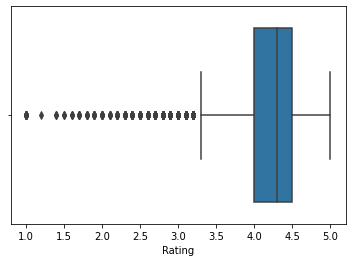

In [ ]:
sns.boxplot(x='Rating',data=df_play_store)
plt.show()

From boxplot there is no outliers in rating column.
Replacing the null values of rating column with median.

In [ ]:
def inpute_median(series):
  return series.fillna(series.median())

In [ ]:
df_play_store.Rating = df_play_store['Rating'].transform(inpute_median)

In [ ]:
# getting null values count column wise
df_play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64